<a href="https://colab.research.google.com/github/johnabhi9514/Back-Gound-Generator/blob/main/Train_Object_Detection_model_TF1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRAIN AN OBJECT DETECTION MODEL FOR A CUSTOM DATASET (TensorFlow 1.x)**

This notebook is part of this [blog post](https://techzizou.com/training-an-ssd-model-for-custom-object-using-tensorflow-1-x/)



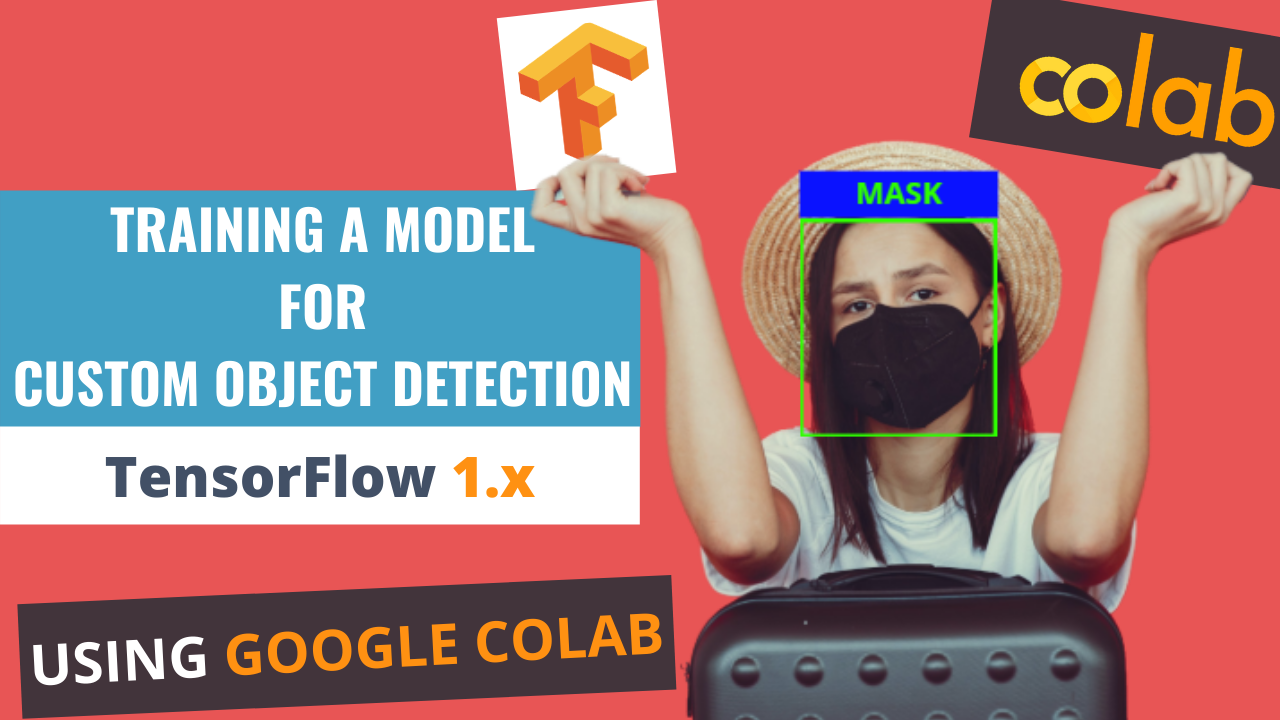



## **ROADMAP**


* Collect the dataset of images and label them to get their xml files.

* Install the TensorFlow Object Detection API.

* Generate the TFRecord files required for training. (need generate_tfrecord.py script and csv files for this)

* Edit the model pipeline config file and download the pre-trained model checkpoint.

* Train and evaluate the model.





# **1) Install tensorflow 1.x**


In [1]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3 MB 22 kB/s 
     |████████████████████████████████| 50 kB 8.9 MB/s 
     |████████████████████████████████| 503 kB 83.4 MB/s 
     |████████████████████████████████| 3.8 MB 83.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=4f9e4e10ba466f9478cea9e930bb6de4c4cab1839ce6e65de942e12f923cb716
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [2]:
import tensorflow as tf
print(tf.__version__)

1.15.0


# **2) Import dependencies**

In [3]:
import os
import glob
import xml.etree.ElementTree as ET
import pandas as pd

# **3) Create *`customTF1`*, *`training`* and *`data`* folders in your google drive**
Create a folder named ***customTF1*** in your google drive.

Create another folder named ***training*** inside the ***customTF1*** folder
(***training*** folder is where the checkpoints will be saved during training)

Create another folder named ***data*** inside the ***customTF1*** folder.


# **4) Create and upload your image files and xml files.**
 Create a folder named ***images*** for your custom dataset images and create another folder named ***annotations*** for its corresponding xml files.
 
 Next, create their zip files and upload them to the ***customTF1*** folder in your drive.



 **<ins>NOTE</ins>**: Make sure all the image files have extension as ".jpg" only.
 Other formats like ".png" , ".jpeg" or even ".JPG" will give errors since the generate_tfrecord and xml_to_csv scripts here have only ".jpg" in them






 ## Collecting Images Dataset and labeling them to get their PASCAL_VOC XML annotations
For Datasets, you can check out my Dataset Sources at the bottom of this article in the credits section. You can use any software for labeling like the labelImg tool.

Read this [article](https://techzizou.com/dataset-labeling-annotation-tutorial-for-beginners/) to know more about collecting datasets and labeling process.


# **5) Upload the *`generate_tfrecord.py`* file to the *`customTF1`* folder on your drive.**


You can find the generate_tfrecord.py file [here](https://github.com/techzizou/Train-Object-Detection-Model-TF-1.x)

#**6) Mount drive and link your folder**

In [4]:
#mount drive
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

#list contents in your drive
!ls /mydrive

Mounted at /content/gdrive
 105459.pdf
'1402921009Exam Form.pdf'
 3010300337.gdoc
'aadhar back .pdf'
'aadhar front.pdf'
'Academic Fee.pdf'
'Adobe Scan Feb 26, 2021.pdf'
'ASSIGN 1.gdoc'
'ASSIGN 2.gdoc'
'cancelled cheque .pdf'
'Colab Notebooks'
 customTF1
'Data Explained ModelTrainingOnColab_final_faster_rcnn.ipynb'
'form 11.pdf'
'form 2.pdf'
'Gratuity form.pdf'
'How to get started with Drive.pdf'
 IMG_20180224_230146.jpg
 IMG_20180224_230149.jpg
 IMG_20180224_230205.jpg
 IMG_20180224_230208.jpg
 IMG_20180224_230213.jpg
 IMG_20180224_230214.jpg
 IMG_20180224_230459.jpg
 indu.jpg
'JD - Analytics.docx'
'marks sheet.pdf'
 MHBAN01273650000011098.pdf
 model_graph.zip
 models-master.zip
'New Doc 2019-03-14 11.50.35 - Page 1.jpg'
'nios assignmet slip 504 & 505.pdf'
'pan card back .pdf'
 pancardfront.pdf
 performics_documents
'Photo from Abhishek'
'Photo from Abhishek (1)'
'Photo from Abhishek (2)'
'Photo from Abhishek (3)'
'Photo from Abhishek (4)'
 Preparation_file.zip
'python assignment 1.gdo

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# **7) Clone the TensorFlow models git repository & Install TensorFlow Object Detection API**





In [5]:
# clone the tensorflow models on the colab cloud vm
!git clone --q https://github.com/tensorflow/models.git

#navigate to /models/research folder to compile protos
%cd models/research

# Compile protos.
!protoc object_detection/protos/*.proto --python_out=.

# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf1/setup.py .  
!python -m pip install .


/content/models/research
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 352 kB 4.2 MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1679303 sha256=bbbd8ec925313224496d779863bdc84bf1213dbb976275771d3ced550acc4441
  Stored in directory: /tmp/pip-ephem-wheel-cache-mq1z_epr/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
Successfully built object-detection


In [6]:
pwd

'/content/models/research'

# **8) Test the model builder**


In [7]:
# testing the model builder
!python object_detection/builders/model_builder_tf1_test.py

Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params0 (True)
[       OK ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params0 (True)
[ RUN      ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params1 (False)
[       OK ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params1 (False)
[ RUN      ] ModelBuilderTF1Test.test_create_experimental_model
[       OK ] ModelBuilderTF1Test.test_create_experimental_model
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature0 (True)
[       OK ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature0 (True)
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature1 (False)
[       OK ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature1 (False)
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_model_from_config_w

# **9) Navigate to *`/mydrive/customTF1/data/`* and unzip the *`images.zip`* and *`annotations.zip`* files into the *`data`* folder**



In [8]:
%cd /mydrive/customTF1/data/

# unzip the datasets and their contents so that they are now in /mydrive/customTF1/data/ folder
!unzip /mydrive/customTF1/images.zip -d .
!unzip /mydrive/customTF1/annotations.zip -d .

/content/gdrive/My Drive/customTF1/data
Archive:  /mydrive/customTF1/images.zip
  inflating: ./images/0.jpg          
  inflating: ./images/0-with-mask.jpg  
  inflating: ./images/100-with-mask.jpg  
  inflating: ./images/101-with-mask.jpg  
  inflating: ./images/103-with-mask.jpg  
  inflating: ./images/104-with-mask.jpg  
  inflating: ./images/105-with-mask.jpg  
  inflating: ./images/106-with-mask.jpg  
  inflating: ./images/107-with-mask.jpg  
  inflating: ./images/108-with-mask.jpg  
  inflating: ./images/109-with-mask.jpg  
  inflating: ./images/10-with-mask.jpg  
  inflating: ./images/110-with-mask.jpg  
  inflating: ./images/111-with-mask.jpg  
  inflating: ./images/112-with-mask.jpg  
  inflating: ./images/113-with-mask.jpg  
  inflating: ./images/114-with-mask.jpg  
  inflating: ./images/115-with-mask.jpg  
  inflating: ./images/116-with-mask.jpg  
  inflating: ./images/117-with-mask.jpg  
  inflating: ./images/118-with-mask.jpg  
  inflating: ./images/119-with-mask.jpg  
  i

# **10) Create `test_labels` & `train_labels`**
Current working directory is /mydrive/customTF1/data/

Divide annotations into test_labels(20%) and train_labels(80%).

In [9]:
#creating two dir for training and testing
!mkdir test_labels train_labels

# lists the files inside 'annotations' in a random order (not really random, by their hash value instead)
# Moves the first 274/1370 labels (20% of the labels) to the testing dir: `test_labels`
!ls annotations/* | sort -R | head -274 | xargs -I{} mv {} test_labels/


# Moves the rest of the labels ( 1096 labels ) to the training dir: `train_labels`
!ls annotations/* | xargs -I{} mv {} train_labels/


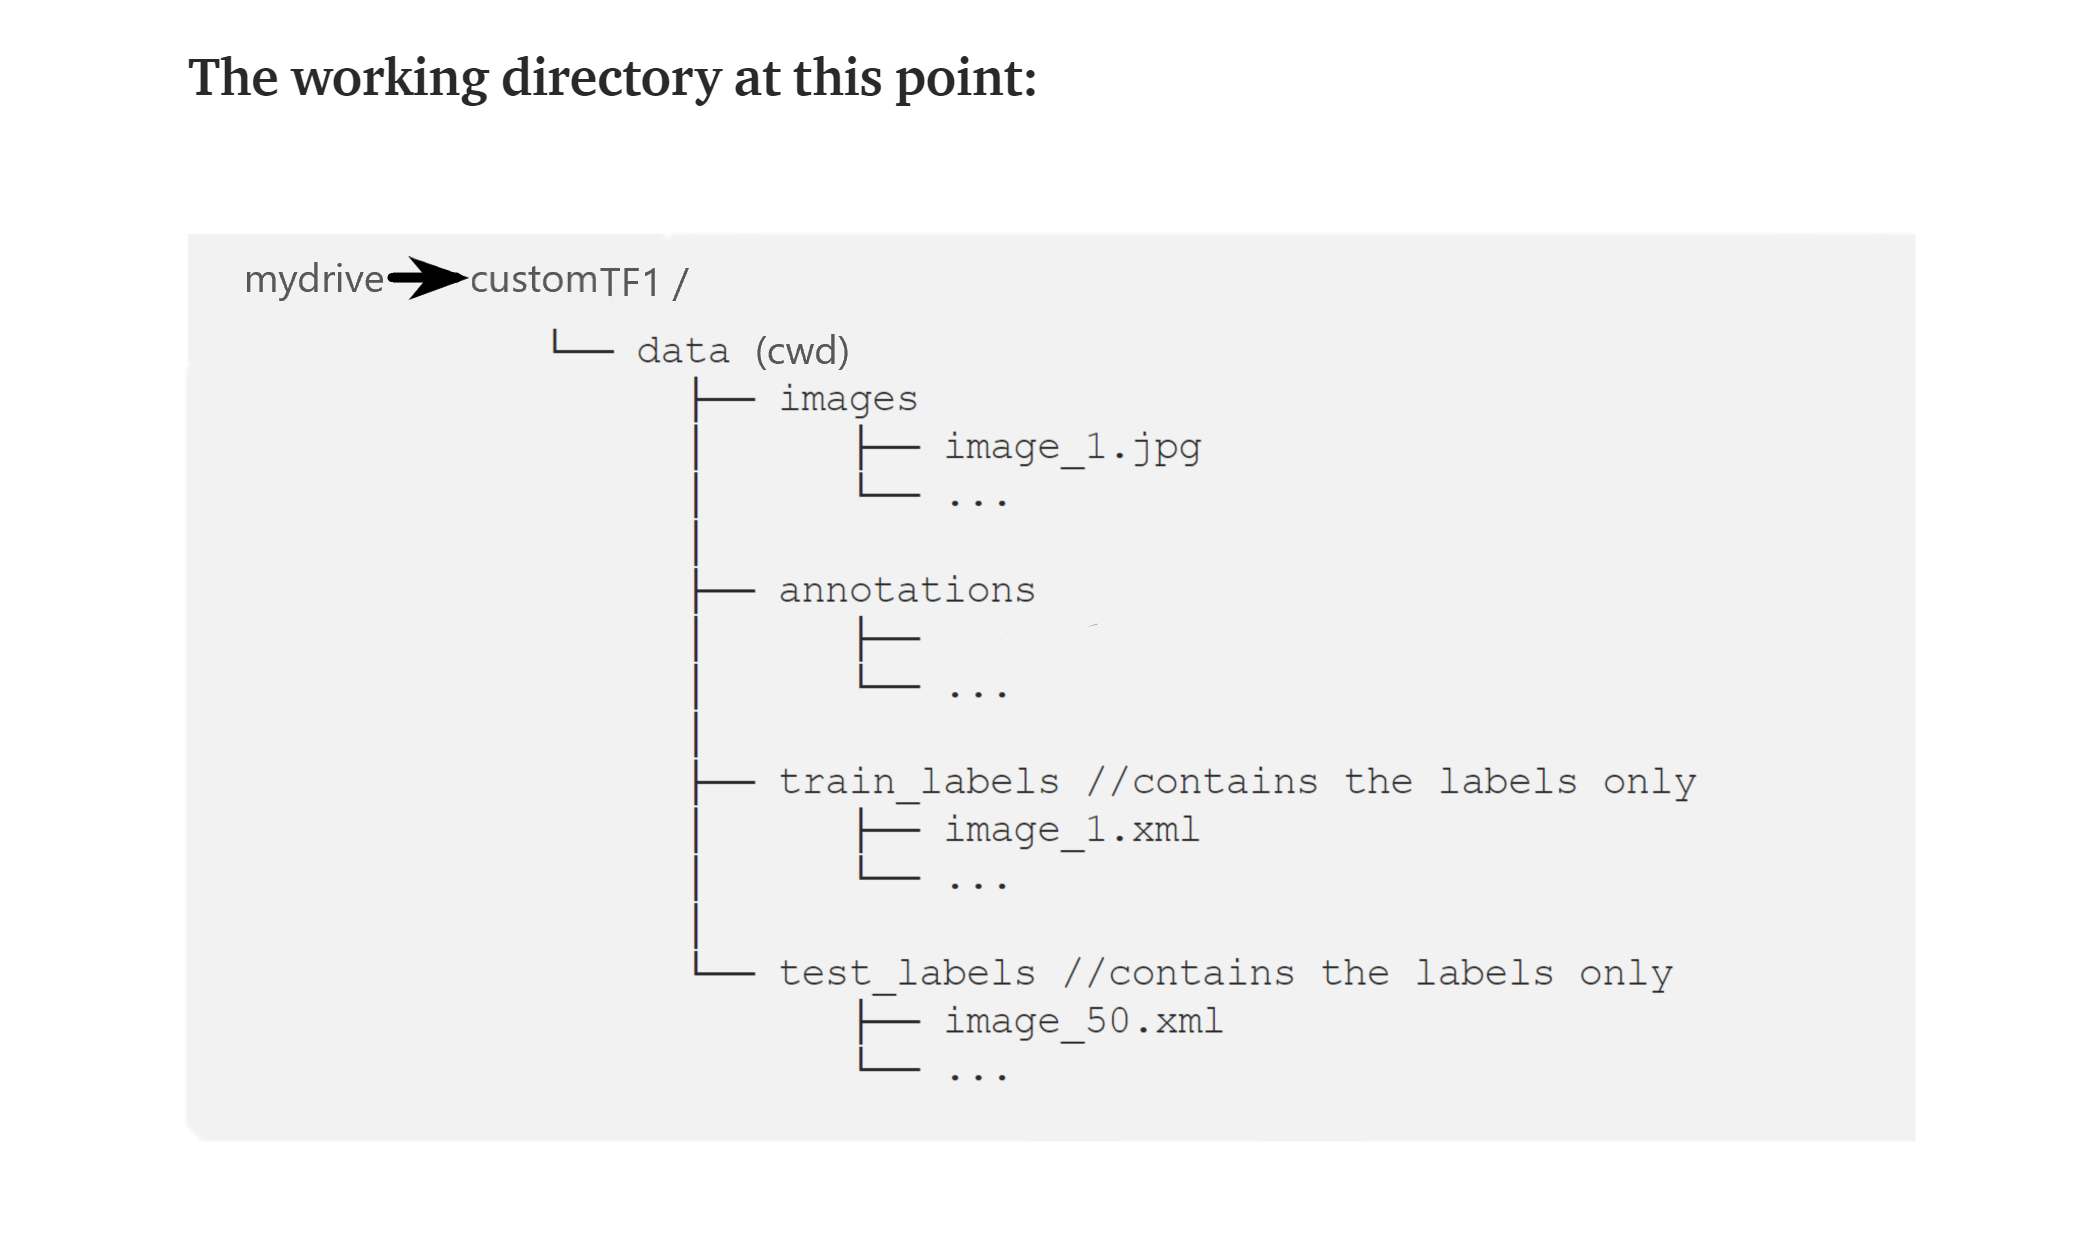

# **11) Create the CSV files and the "label_map.pbtxt" file**
Current working directory is /mydrive/customTF1/data/

Run xml_to_csv script below to create ***test_labels.csv*** and ***train_labels.csv***

This also creates the ***label_map.pbtxt*** file using the classes mentioned in the xml files. 

In [10]:
#adjusted from: https://github.com/datitran/raccoon_dataset
def xml_to_csv(path):
  classes_names = []
  xml_list = []

  for xml_file in glob.glob(path + '/*.xml'):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for member in root.findall('object'):
      classes_names.append(member[0].text)
      value = (root.find('filename').text  ,       
               int(root.find('size')[0].text),
               int(root.find('size')[1].text),
               member[0].text,
               int(member[4][0].text),
               int(member[4][1].text),
               int(member[4][2].text),
               int(member[4][3].text))
      xml_list.append(value)
  column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
  xml_df = pd.DataFrame(xml_list, columns=column_name) 
  classes_names = list(set(classes_names))
  classes_names.sort()
  return xml_df, classes_names

for label_path in ['train_labels', 'test_labels']:
  image_path = os.path.join(os.getcwd(), label_path)
  xml_df, classes = xml_to_csv(label_path)
  xml_df.to_csv(f'{label_path}.csv', index=None)
  print(f'Successfully converted {label_path} xml to csv.')

label_map_path = os.path.join("label_map.pbtxt")
pbtxt_content = ""

for i, class_name in enumerate(classes):
    pbtxt_content = (
        pbtxt_content
        + "item {{\n    id: {0}\n    name: '{1}'\n}}\n\n".format(i + 1, class_name)
    )
pbtxt_content = pbtxt_content.strip()
with open(label_map_path, "w") as f:
    f.write(pbtxt_content)
    print('Successfully created label_map.pbtxt ')

Successfully converted train_labels xml to csv.
Successfully converted test_labels xml to csv.
Successfully created label_map.pbtxt 


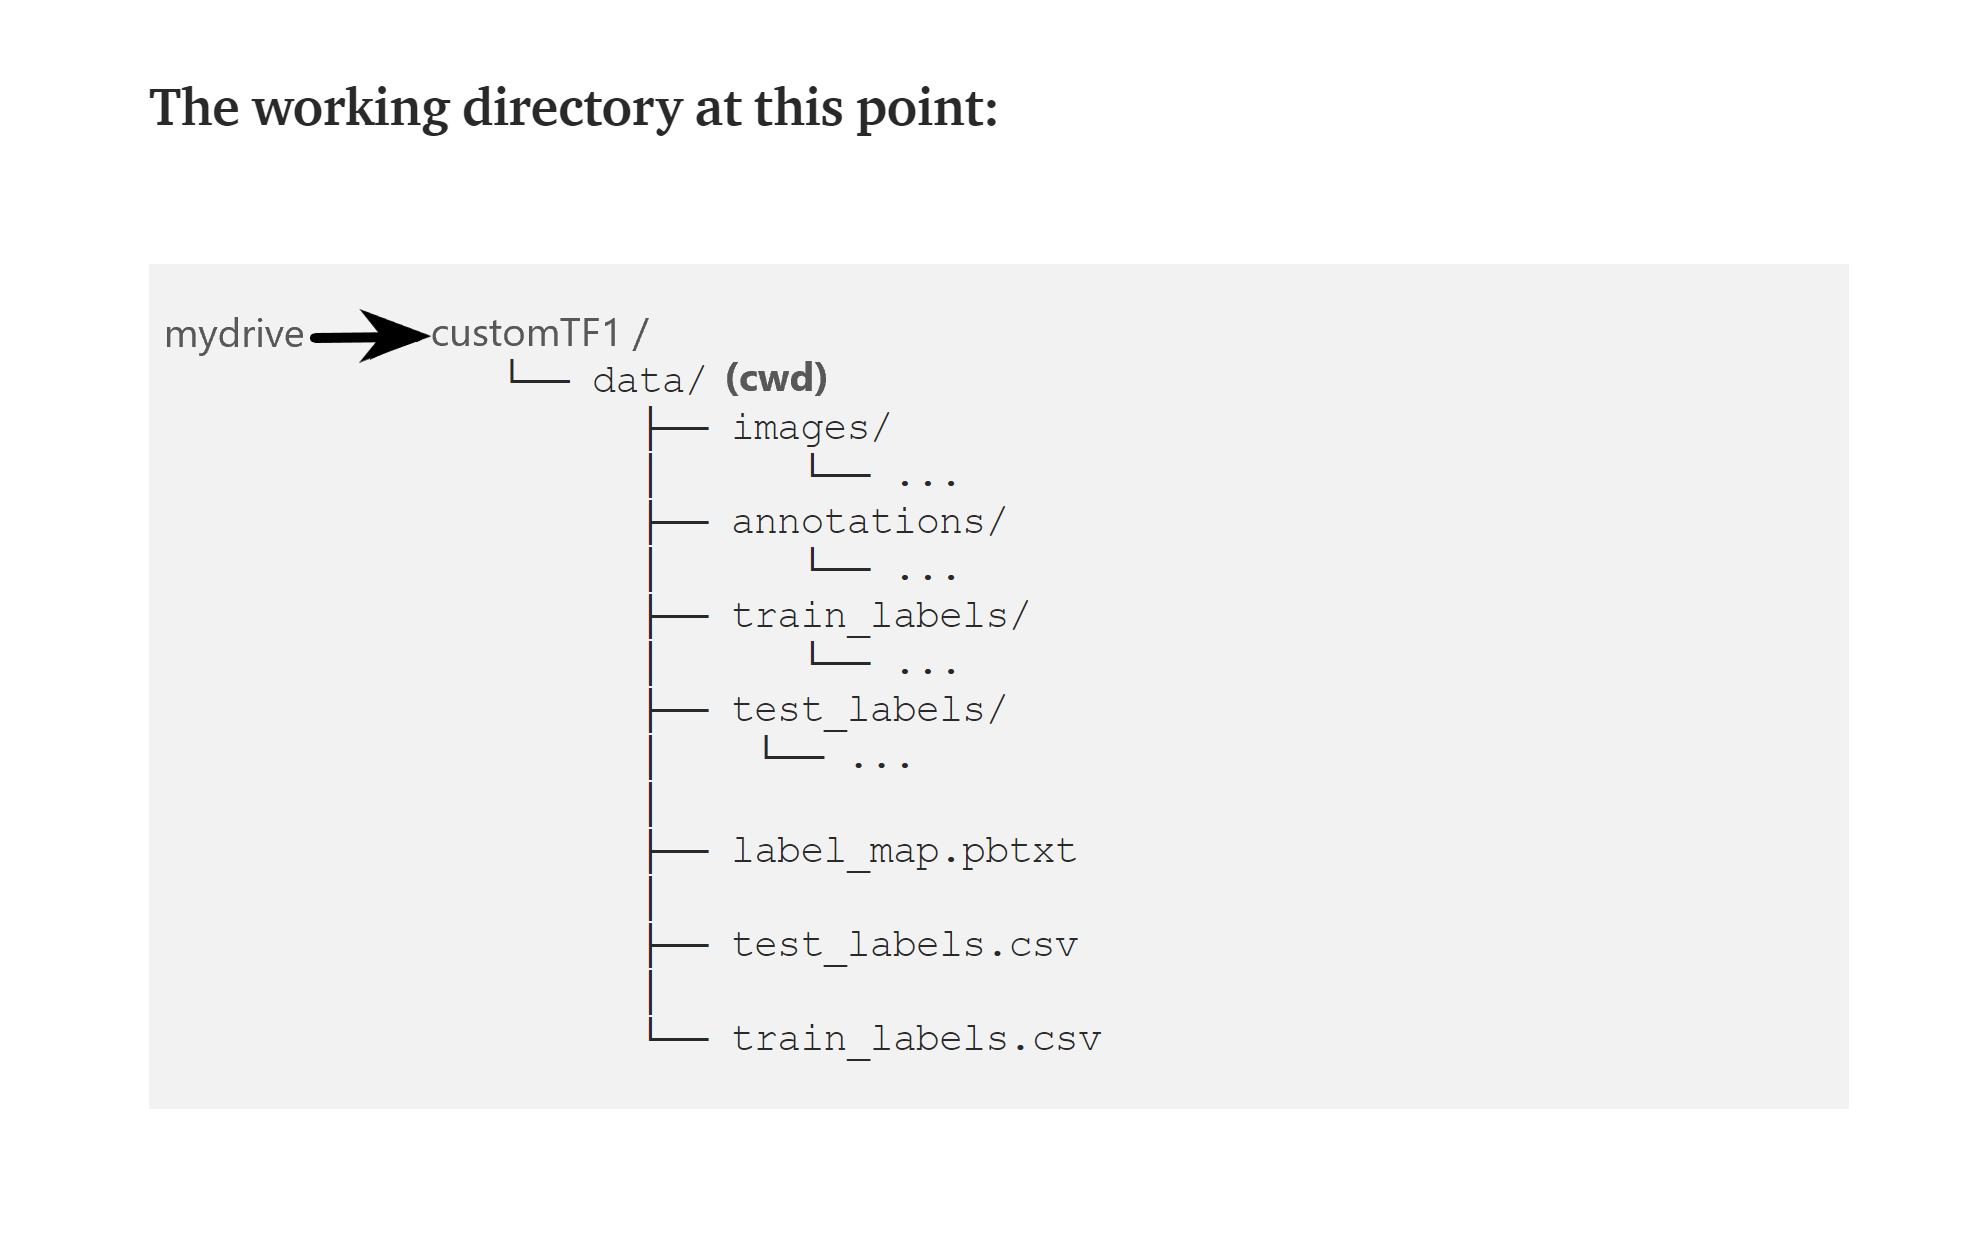

# **12) Create `train.record` & `test.record` files**

Current working directory is /mydrive/customTF1/data/

Run the *generate_tfrecord.py* script to create *train.record* and *test.record* files



In [11]:
%cd /mydrive/customTF1/data/

/content/gdrive/My Drive/customTF1/data


In [12]:
#Usage:  
#!python generate_tfrecord.py output.csv output_pb.txt /path/to/images output.tfrecords

#FOR train.record
!python /mydrive/customTF1/generate_tfrecord.py train_labels.csv  label_map.pbtxt images/ train.record

#FOR test.record
!python /mydrive/customTF1/generate_tfrecord.py test_labels.csv  label_map.pbtxt images/ test.record

groups: 100% 1096/1096 [00:01<00:00, 567.27it/s]
Successfully created the TFRecords: /content/gdrive/My Drive/customTF1/data/train.record
groups: 100% 274/274 [00:00<00:00, 588.77it/s]
Successfully created the TFRecords: /content/gdrive/My Drive/customTF1/data/test.record


# **13) Download pre-trained model checkpoint** 

Current working directory is /mydrive/customTF1/data/

Download **ssd_mobilenet_v2_coco_2018_03_29.tar.gz** into the ***data*** folder & unzip it.

A list of detection checkpoints for tensorflow 1.x can be found [here](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf1_detection_zoo.md).


In [13]:
#Download the pre-trained model ssd_mobilenet_v2_coco_2018_03_29.tar.gz into the data folder & unzip it.

!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
!tar -xzvf ssd_mobilenet_v2_coco_2018_03_29.tar.gz

--2021-11-06 13:13:49--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.97.128, 2404:6800:4008:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.97.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187925923 (179M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’

ssd_mobilenet_v2_co 100%[===================>] 179.22M  46.6MB/s    in 3.8s    

2021-11-06 13:13:54 (46.6 MB/s) - ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’ saved [187925923/187925923]

ssd_mobilenet_v2_coco_2018_03_29/checkpoint
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.meta
ssd_mobilenet_v2_coco_2018_03_29/pipeline.config
ssd_mobilenet_v2_coco_2018_03_29/saved_model/saved_model.pb
ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb
ssd_mobilenet_v2_coco_2018_03_29/saved_model/
ssd_mobilenet_v2_coco_2018_03_29/saved_mod

# **14) Get the model pipeline `config` file, make changes to it and put it inside the *`data`* folder**

Download **ssd_mobilenet_v2_coco.config** from ***/content/models/research/object_detection/samples/configs/*** folder. Make the required changes to it and upload it to the ***/mydrive/customTF1/data*** folder.

**OR**

Edit the config file from ***/content/models/research/object_detection/samples/configs/*** in colab and copy the edited config file to the ***/mydrive/customTF1/data*** folder.


**You need to make the following changes:**
*   change ***num_classes*** to number of your classes.
*   change ***test.record*** path, ***train.record*** path & ***labelmap*** path to the paths where you have created these files (paths should be relative to your current working directory while training).
* change ***fine_tune_checkpoint*** to the path where the downloaded checkpoint from step 13 is. 
* change ***fine_tune_checkpoint_type*** with value **classification** or **detection** depending on the type.
* change ***batch_size*** to any multiple of 8 depending upon the capability of your GPU.
(eg:- 24,128,...,512).Mine is set to 24. 
* change ***num_steps*** to number of steps you want the detector to train. 



In [14]:
#FOR METHOD 2 ,copy the confif file to the data folder 
!cp /content/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config /mydrive/customTF1/data/

# **15) Load Tensorboard**

In [15]:
#load tensorboard
%load_ext tensorboard 
%tensorboard --logdir '/content/gdrive/MyDrive/customTF1/training'

# **16) Train the model**






 ## Navigate to the ***object_detection*** folder in colab vm

In [16]:
#FOR METHOD 2 ,change directory to object_detection
%cd /content/models/research/object_detection

/content/models/research/object_detection


In [17]:
pwd

'/content/models/research/object_detection'

## Training & evaluation using model_main.py

```
Run this command from the object_detection directory

PIPELINE_CONFIG_PATH={path to pipeline config file}
MODEL_DIR={path to model directory}
NUM_TRAIN_STEPS=50000
SAMPLE_1_OF_N_EVAL_EXAMPLES=1

!python model_main.py --pipeline_config_path=${PIPELINE_CONFIG_PATH} --model_dir=${MODEL_DIR} --num_train_steps=${NUM_TRAIN_STEPS} --sample_1_of_n_eval_examples=${SAMPLE_1_OF_N_EVAL_EXAMPLES} --alsologtostderr

```



where **{PIPELINE_CONFIG_PATH}** points to the pipeline config and 
**{MODEL_DIR}** points to the directory in which training checkpoints and events will be written. Note that this binary will interleave both training and evaluation.

**NOTE**: For best results, you should stop the training when the loss is less than 1 if possible, else train the model until the loss does not show any significant change for a while. 



## RETRAINING THE MODEL ( in case you get disconnected )


If you get disconnected or lose your session on colab vm, you can start your training where you left off as the checkpoint is saved on your drive inside the ***training*** folder. To restart the training simply run **steps 1, 2, 6, 7, 8, 15 and 16.**

Note that since we have all the files required for training like the record files,our edited pipeline config file,the labelmap file and the model checkpoint folder, therefore we do not need to create these again.

 We just need to make one change in our pipeline config file.

Change **fine_tune_checkpoint** to where your latest trained checkpoints have been written.
``` 
fine_tune_checkpoint: "/mydrive/customTF1/training/model.ckpt-xxxx" (where model.ckpt-xxxx is the latest checkpoint)

```




In [18]:
#For Training and Evaluation

!python model_main.py --pipeline_config_path=/mydrive/customTF1/data/ssd_mobilenet_v2_coco.config --model_dir=/mydrive/customTF1/training --alsologtostderr

INFO:tensorflow:global_step/sec: 2.82732
I1106 16:15:06.553519 140091840792448 basic_session_run_hooks.py:692] global_step/sec: 2.82732
INFO:tensorflow:loss = 1.5648688, step = 27200 (35.370 sec)
I1106 16:15:06.554867 140091840792448 basic_session_run_hooks.py:260] loss = 1.5648688, step = 27200 (35.370 sec)
Traceback (most recent call last):
  File "model_main.py", line 108, in <module>
    tf.app.run()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow_core/python/platform/app.py", line 40, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 303, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "model_main.py", line 104, in main
    tf.estimator.train_and_evaluate(estimator, train_spec, eval_specs[0])
  File "/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/t

## AUTO-CLICK TO AVOID BEING KICKED OFF COLAB

Press (Ctrl + Shift + i) . Go to console. Paste the following code and press Enter.

```
function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)
```



In [19]:
pwd

'/content/models/research/object_detection'

# **17) Test your trained model**



## Export inference graph

Current working directory is /content/models/research/object_detection

In [20]:
!python export_inference_graph.py --input_type image_tensor --pipeline_config_path /mydrive/customTF1/data/ssd_mobilenet_v2_coco.config --trained_checkpoint_prefix /mydrive/customTF1/training/model.ckpt-26289 --output_directory /mydrive/customTF1/data/inference_graph

Instructions for updating:
Please use `layer.__call__` method instead.
W1106 16:16:59.065323 140120470546304 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I1106 16:17:00.950407 140120470546304 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1106 16:17:00.984869 140120470546304 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1106 16:17:01.019367 140120470546304 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv befo

## Test your trained Object Detection model on images

Current working directory is /content/models/research/object_detection




In [21]:
#navigate to object_detection folder
%cd /content/models/research/object_detection

/content/models/research/object_detection


In [ ]:
# Different font-type and font-size for labels text.(This step is optional)
!wget https://freefontsdownload.net/download/160187/arial.zip
!unzip arial.zip -d .

%cd utils/
!sed -i "s/font = ImageFont.truetype('arial.ttf', 24)/font = ImageFont.truetype('arial.ttf', 50)/" visualization_utils.py
%cd ..

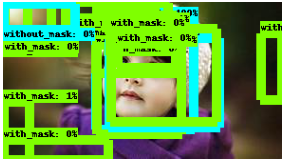

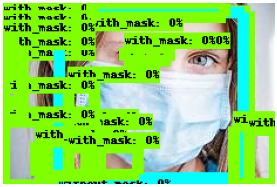

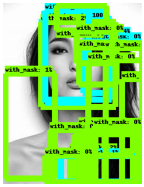

In [35]:
# RUNNING INFERENCE
import numpy as np
import os
import cv2
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
from google.colab.patches import cv2_imshow
from collections import defaultdict
from io import StringIO
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

# This is needed to display the images.
%matplotlib inline

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

# Change these values for the model used
num_classes = 2 # Change this value to the number of classes of the model
IMAGE_SIZE = (12, 8) # Output display size as you want

# Use images in test dir
IMAGE_DIR = "/content/gdrive/MyDrive/customTF1/test_image"
IMAGE_PATHS = []
for file in os.listdir(IMAGE_DIR):
    if file.endswith(".jpg") or file.endswith(".png"):
        IMAGE_PATHS.append(os.path.join(IMAGE_DIR, file))

# Set paths to the trained model
PATH_TO_LABELS = '/content/gdrive/MyDrive/customTF1/data/label_map.pbtxt'
PATH_TO_CKPT = os.path.join(os.path.abspath("/content/gdrive/MyDrive/customTF1/data/inference_graph"), "frozen_inference_graph.pb")


# Set tensorflow graph
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

# Set categories
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Convert input image to a numpy array
def load_image_to_numpy(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Inference pipeline
def run_inference(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, .5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict

# Run the inference for each image
for image_path in IMAGE_PATHS:
    image = Image.open(image_path)
    # Conver the image to numpy array
    image_np = load_image_to_numpy(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Perform the interence
    output_dict = run_inference(image_np, detection_graph)
    # Visualize
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=10,
        min_score_thresh=0)
    plt.figure(figsize=IMAGE_SIZE, dpi=30)
    plt.axis("off")
    plt.imshow(image_np)


# **MY GITHUB** 


*   [Object Detection using Tensorflow 1.x](https://github.com/techzizou/Train-Object-Detection-Model-TF-1.x)

# **♕ TECHZIZOU ♕** 





# 🖖